# 준비

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

from statistical_analysis import *

In [ ]:
movie_genre = pd.read_parquet("files/movie/02_movie_genre.parquet")
drama_genre = pd.read_parquet("files/drama/01_drama_genre.parquet")

hit_score = pd.read_parquet("files/00_hit_score.parquet")

movie = pd.read_parquet("files/movie/00_movie_main.parquet")
drama = pd.read_parquet("files/drama/00_drama_main.parquet")

movie_country = pd.read_parquet("files/movie/04_movie_country.parquet")
drama_country = pd.read_parquet("files/drama/02_drama_country.parquet")

movie_provider = pd.read_parquet("files/movie/05_movie_provider.parquet")
drama_provider = pd.read_parquet("files/drama/06_drama_provider.parquet")

movie_topic = pd.read_parquet("files/embedding/00_movie_topic.parquet")
drama_topic = pd.read_parquet("files/embedding/00_drama_topic.parquet")

movie_hit_topic = pd.read_parquet("files/embedding/hit_movie_topics.parquet")
movie_hit_topic = movie_hit_topic[['imdb_id', 'topic']]
drama_hit_topic = pd.read_parquet("files/embedding/hit_drama_topics.parquet")
drama_hit_topic = drama_hit_topic[['imdb_id', 'topic']]

movie_hit_score = hit_score[hit_score['imdb_id'].isin(movie['imdb_id'])].copy()
drama_hit_score = hit_score[~hit_score['imdb_id'].isin(movie['imdb_id'])].copy()

movie_hit_score['is_hit'] = np.where(movie_hit_score['hit_score'] > np.quantile(movie_hit_score['hit_score'], 0.8), 1, 0)
drama_hit_score['is_hit'] = np.where(drama_hit_score['hit_score'] > np.quantile(drama_hit_score['hit_score'], 0.8), 1, 0)


# 장르

In [ ]:
df_m_genre = pd.merge(movie_genre, movie_hit_score, on="imdb_id")
df_d_genre = pd.merge(drama_genre, drama_hit_score, on="imdb_id")

In [ ]:
pre_test(df_m_genre, 'genre')

In [ ]:
pre_test(df_d_genre, 'genre')

In [ ]:
kruskal_test(df_d_genre, 'genre')

In [ ]:
kruskal_test(df_m_genre, 'genre')

In [ ]:
chi_square_test(df_m_genre, 'genre', 'is_hit')


In [21]:
chi_square_test(df_d_genre, 'genre', 'is_hit')

Chi-squared 독립성 검정 결과
독립변수: genre
종속변수: is_hit
샘플 크기: 6,795
교차표 크기: 10 × 2
------------------------------------------------------------
Chi-squared 통계량: 52.4853
자유도 (dof): 9
p-value: 0.000000 (< 0.001)
유의수준 (α): 0.05
------------------------------------------------------------
Cramér's V: 0.0879
효과 크기 해석: 무시 가능 (negligible)
------------------------------------------------------------
✅ 결과: 통계적으로 유의함 (p < 0.05)
   → genre과(와) is_hit은(는) 독립적이지 않음



{'chi2': np.float64(52.48532663582634),
 'p_value': np.float64(3.658754586753559e-08),
 'dof': 9,
 'cramers_v': np.float64(0.08788691529562564),
 'effect_size': np.float64(0.08788691529562564),
 'effect_interpretation': '무시 가능 (negligible)',
 'significant': np.True_,
 'alpha': 0.05,
 'crosstab': is_hit                 0    1
 genre                        
 Action & Adventure   335  106
 Comedy               513  180
 Crime                723  196
 Drama               2565  642
 Family                71   14
 Mystery              574  116
 Sci-Fi & Fantasy     430  119
 Soap                  79    0
 War & Politics        72   32
 Western               19    9,
 'expected': array([[ 349.23046358,   91.76953642],
        [ 548.79072848,  144.20927152],
        [ 727.76144224,  191.23855776],
        [2539.6419426 ,  667.3580574 ],
        [  67.31199411,   17.68800589],
        [ 546.41501104,  143.58498896],
        [ 434.75629139,  114.24370861],
        [  62.56055923,   16.43944077],

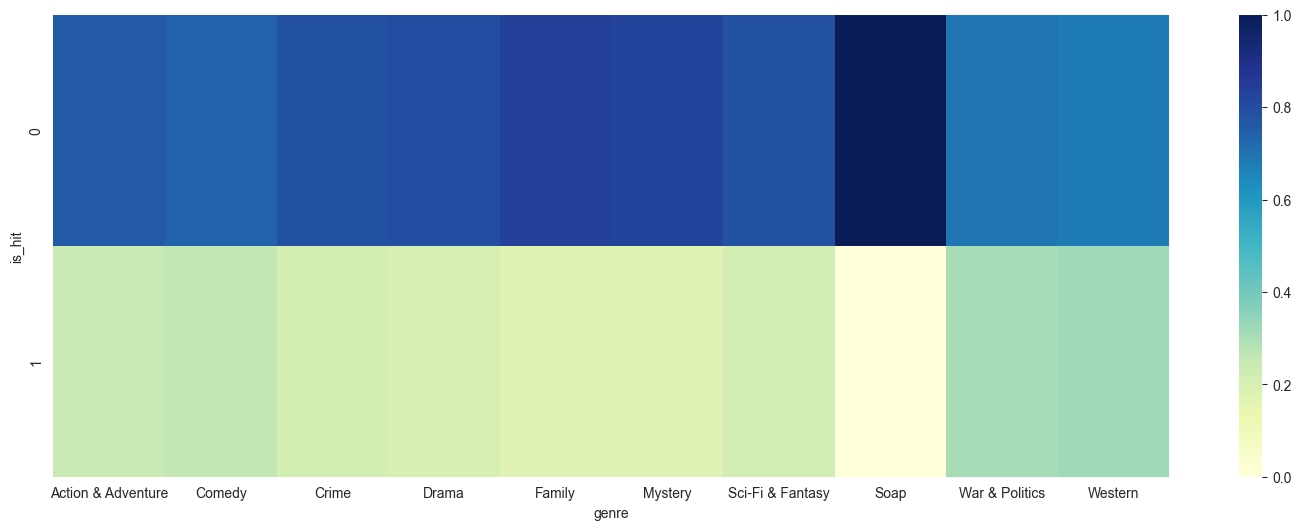

In [17]:
create_heatmap(df_d_genre, 'genre', 'is_hit')

In [ ]:
create_heatmap(df_m_genre, 'genre', 'is_hit')

# 국가

In [ ]:
df_m_county = pd.merge(movie_country, movie_hit_score, on="imdb_id")
df_d_county = pd.merge(drama_country, drama_hit_score, on="imdb_id")

In [ ]:
pre_test(df_m_county, 'production_countries')

In [ ]:
pre_test(df_d_county, 'origin_country')

In [24]:
kruskal_test(df_m_county, 'production_countries')

Kruskal-Wallis H 검정: production_countries → hit_score

그룹 수: 11
전체 샘플: 34,472

                category     n    median      mean       std      min       max
                  canada  1963 25.333517 25.382369  9.170937 2.284956 66.205212
united states of america 12496 27.635549 27.844447 11.260064 1.751206 74.984362
                   other  7126 27.924498 27.571365  9.519919 2.867080 62.681697
          united kingdom  2882 30.058627 29.996995 10.966914 2.651942 74.984362
                  france  3296 27.979104 27.842221  9.276751 3.499455 70.528902
                 belgium   864 28.407721 28.134311  8.976262 5.459411 55.482779
                 germany  1568 28.780738 28.526038  9.673156 1.929062 63.460699
                   italy  1076 26.125284 24.626070  9.679915 1.936792 55.358129
                   india  1145 36.030352 34.581027 10.523984 3.363426 63.476287
                   japan  1120 28.266187 27.902618  9.316033 4.883051 63.713538
                   spain   936 27.838189 

{'H': np.float64(813.0220014502393),
 'p_value': np.float64(3.272483011980618e-168),
 'dof': 10,
 'epsilon_squared': np.float64(0.023302341819745196),
 'eta_squared': np.float64(0.023585680759195825),
 'effect_interpretation': '작음 (small)',
 'significant': np.True_,
 'groups': ['canada',
  'united states of america',
  'other',
  'united kingdom',
  'france',
  'belgium',
  'germany',
  'italy',
  'india',
  'japan',
  'spain'],
 'group_stats':                     category      n     median       mean        std  \
 0                     canada   1963  25.333517  25.382369   9.170937   
 1   united states of america  12496  27.635549  27.844447  11.260064   
 2                      other   7126  27.924498  27.571365   9.519919   
 3             united kingdom   2882  30.058627  29.996995  10.966914   
 4                     france   3296  27.979104  27.842221   9.276751   
 5                    belgium    864  28.407721  28.134311   8.976262   
 6                    germany   1568  28.

In [25]:
kruskal_test(df_d_county, 'origin_country')

Kruskal-Wallis H 검정: origin_country → hit_score

그룹 수: 11
전체 샘플: 3,321

category    n    median      mean      std       min       max
      us 1281 33.976887 34.680440 9.520361  9.103409 66.691607
      gb  438 32.570668 33.624738 8.692559 15.046595 62.741931
      es  115 28.477061 29.045434 7.510492 10.772645 47.660874
   other  594 31.530676 31.560395 9.079855  6.069949 63.251615
      ca   84 30.059746 31.188359 8.231378  8.806519 53.033515
      co   42 24.939191 25.212520 8.636997  9.410838 48.173605
      kr  437 32.605619 32.937914 7.471935  8.808499 55.405272
      mx  112 25.120742 23.820976 8.026373  6.788203 39.182484
      cn   72 32.668982 32.526287 5.709230 20.566221 47.934478
      fr   74 31.318476 30.794535 7.524697  7.156173 47.620441
      tr   72 35.469640 35.723927 8.748944 15.256032 54.233838

------------------------------------------------------------
검정 결과:
------------------------------------------------------------
H 통계량: 210.3217
p-value: 0.000000
자유도: 10


{'H': np.float64(210.32169269764992),
 'p_value': np.float64(1.1300692229693198e-39),
 'dof': 10,
 'epsilon_squared': np.float64(0.06052014885125375),
 'eta_squared': np.float64(0.06334990743905118),
 'effect_interpretation': '중간 (medium)',
 'significant': np.True_,
 'groups': ['us',
  'gb',
  'es',
  'other',
  'ca',
  'co',
  'kr',
  'mx',
  'cn',
  'fr',
  'tr'],
 'group_stats':    category     n     median       mean       std        min        max
 0        us  1281  33.976887  34.680440  9.520361   9.103409  66.691607
 1        gb   438  32.570668  33.624738  8.692559  15.046595  62.741931
 2        es   115  28.477061  29.045434  7.510492  10.772645  47.660874
 3     other   594  31.530676  31.560395  9.079855   6.069949  63.251615
 4        ca    84  30.059746  31.188359  8.231378   8.806519  53.033515
 5        co    42  24.939191  25.212520  8.636997   9.410838  48.173605
 6        kr   437  32.605619  32.937914  7.471935   8.808499  55.405272
 7        mx   112  25.120742  2

In [26]:
chi_square_test(df_m_county, 'production_countries', 'is_hit')

Chi-squared 독립성 검정 결과
독립변수: production_countries
종속변수: is_hit
샘플 크기: 34,472
교차표 크기: 11 × 2
------------------------------------------------------------
Chi-squared 통계량: 995.6305
자유도 (dof): 10
p-value: 0.000000 (< 0.001)
유의수준 (α): 0.05
------------------------------------------------------------
Cramér's V: 0.1699
효과 크기 해석: 작음 (small)
------------------------------------------------------------
✅ 결과: 통계적으로 유의함 (p < 0.05)
   → production_countries과(와) is_hit은(는) 독립적이지 않음



{'chi2': np.float64(995.6304616671891),
 'p_value': np.float64(1.6336172983037676e-207),
 'dof': 10,
 'cramers_v': np.float64(0.16994791750499252),
 'effect_size': np.float64(0.16994791750499252),
 'effect_interpretation': '작음 (small)',
 'significant': np.True_,
 'alpha': 0.05,
 'crosstab': is_hit                       0     1
 production_countries                
 belgium                    698   166
 canada                    1731   232
 france                    2702   594
 germany                   1226   342
 india                      554   591
 italy                      965   111
 japan                      914   206
 other                     5816  1310
 spain                      774   162
 united kingdom            2058   824
 united states of america  9565  2931,
 'expected': array([[ 676.79832908,  187.20167092],
        [1537.67953702,  425.32046298],
        [2581.86029241,  714.13970759],
        [1228.26363425,  339.73636575],
        [ 896.91445231,  248.08554769],
  

In [27]:
chi_square_test(df_d_county, 'origin_country', 'is_hit')

Chi-squared 독립성 검정 결과
독립변수: origin_country
종속변수: is_hit
샘플 크기: 3,321
교차표 크기: 11 × 2
------------------------------------------------------------
Chi-squared 통계량: 114.7628
자유도 (dof): 10
p-value: 0.000000 (< 0.001)
유의수준 (α): 0.05
------------------------------------------------------------
Cramér's V: 0.1859
효과 크기 해석: 작음 (small)
------------------------------------------------------------
✅ 결과: 통계적으로 유의함 (p < 0.05)
   → origin_country과(와) is_hit은(는) 독립적이지 않음



{'chi2': np.float64(114.76283699816639),
 'p_value': np.float64(5.824189811361457e-20),
 'dof': 10,
 'cramers_v': np.float64(0.18589435421736322),
 'effect_size': np.float64(0.18589435421736322),
 'effect_interpretation': '작음 (small)',
 'significant': np.True_,
 'alpha': 0.05,
 'crosstab': is_hit            0    1
 origin_country          
 ca               75    9
 cn               65    7
 co               41    1
 es              106    9
 fr               67    7
 gb              339   99
 kr              367   70
 mx              112    0
 other           499   95
 tr               46   26
 us              948  333,
 'expected': array([[  67.40740741,   16.59259259],
        [  57.77777778,   14.22222222],
        [  33.7037037 ,    8.2962963 ],
        [  92.28395062,   22.71604938],
        [  59.38271605,   14.61728395],
        [ 351.48148148,   86.51851852],
        [ 350.67901235,   86.32098765],
        [  89.87654321,   22.12345679],
        [ 476.66666667,  117.33333333],

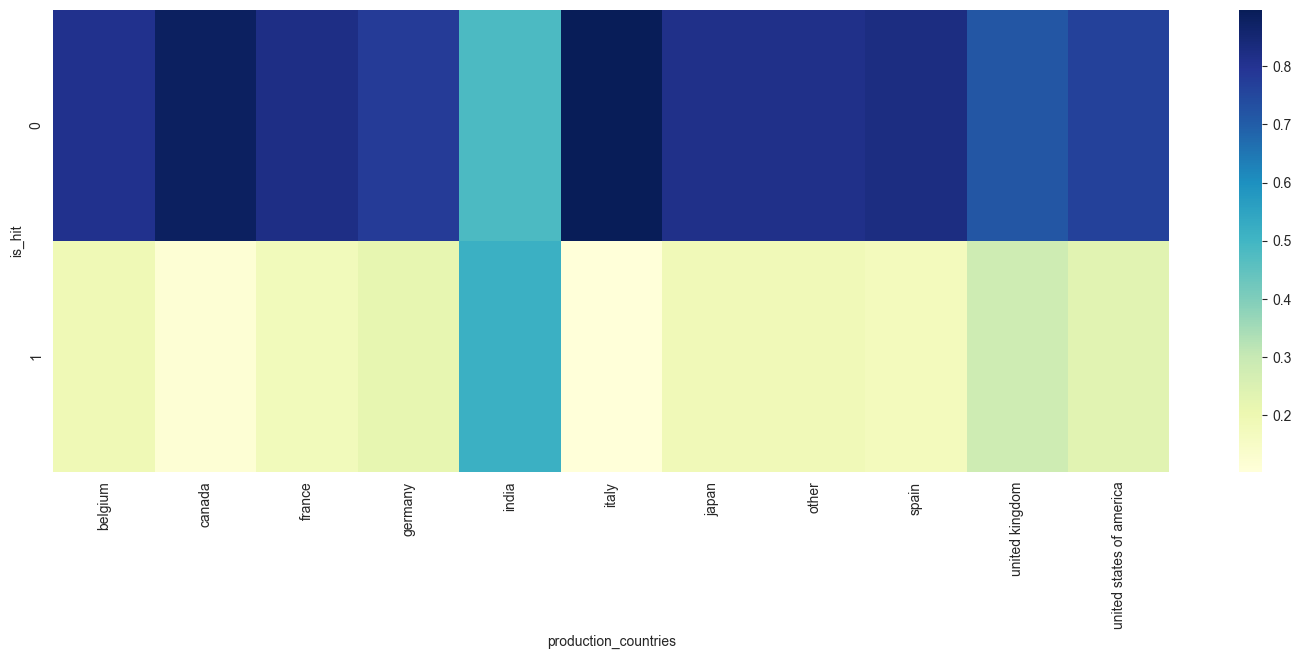

In [28]:
create_heatmap(df_m_county, 'production_countries', 'is_hit')

In [ ]:
create_heatmap(df_d_county, 'origin_country', 'is_hit')

# OTT

In [ ]:
df_m_provider = pd.merge(movie_provider, movie_hit_score, on="imdb_id")
df_d_provider = pd.merge(drama_provider, drama_hit_score, on="imdb_id")

In [ ]:
df_d_provider.groupby('providers_flatrate')['is_hit'].mean()

In [31]:
chi_square_test(df_m_provider, 'providers_flatrate', 'is_hit')

Chi-squared 독립성 검정 결과
독립변수: providers_flatrate
종속변수: is_hit
샘플 크기: 69,358
교차표 크기: 11 × 2
------------------------------------------------------------
Chi-squared 통계량: 2040.3775
자유도 (dof): 10
p-value: 0.000000 (< 0.001)
유의수준 (α): 0.05
------------------------------------------------------------
Cramér's V: 0.1715
효과 크기 해석: 작음 (small)
------------------------------------------------------------
✅ 결과: 통계적으로 유의함 (p < 0.05)
   → providers_flatrate과(와) is_hit은(는) 독립적이지 않음



{'chi2': np.float64(2040.3774708836067),
 'p_value': np.float64(0.0),
 'dof': 10,
 'cramers_v': np.float64(0.17151692387577028),
 'effect_size': np.float64(0.17151692387577028),
 'effect_interpretation': '작음 (small)',
 'significant': np.True_,
 'alpha': 0.05,
 'crosstab': is_hit                  0     1
 providers_flatrate             
 amazon prime video  10598  2975
 filmin               2044   701
 fubotv               2109   550
 hbo max              1454  1189
 kpn                  2538  1859
 movistar             2913  1661
 netflix              3955  1890
 other               15437  4308
 u-next               2293  1534
 watcha               2844  1104
 wavve                2236   737,
 'expected': array([[ 9819.63323821,  3753.36676179],
        [ 1985.92007949,   759.07992051],
        [ 1923.70181834,   735.29818166],
        [ 1912.1263279 ,   730.8736721 ],
        [ 3181.08946794,  1215.91053206],
        [ 3309.14333099,  1264.85666901],
        [ 4228.67135323,  1616.328

In [32]:
chi_square_test(df_d_provider, 'providers_flatrate', 'is_hit')

Chi-squared 독립성 검정 결과
독립변수: providers_flatrate
종속변수: is_hit
샘플 크기: 4,547
교차표 크기: 12 × 2
------------------------------------------------------------
Chi-squared 통계량: 465.5023
자유도 (dof): 11
p-value: 0.000000 (< 0.001)
유의수준 (α): 0.05
------------------------------------------------------------
Cramér's V: 0.3200
효과 크기 해석: 중간 (medium)
------------------------------------------------------------
✅ 결과: 통계적으로 유의함 (p < 0.05)
   → providers_flatrate과(와) is_hit은(는) 독립적이지 않음



{'chi2': np.float64(465.50234481672777),
 'p_value': np.float64(7.2118806063003175e-93),
 'dof': 11,
 'cramers_v': np.float64(0.3199620416845093),
 'effect_size': np.float64(0.3199620416845093),
 'effect_interpretation': '중간 (medium)',
 'significant': np.True_,
 'alpha': 0.05,
 'crosstab': is_hit                 0    1
 providers_flatrate           
 amazon prime video   204  130
 disney plus           65   50
 hbo max               40   59
 hulu                  87   74
 kinopoisk             37   61
 movistar              65   66
 netflix               83   75
 none                2046  403
 okko                  67   39
 other                454  211
 strim                 39   62
 u-next                74   56,
 'expected': array([[ 239.53683748,   94.46316252],
        [  82.47525841,   32.52474159],
        [  71.00043985,   27.99956015],
        [ 115.46536178,   45.53463822],
        [  70.28326369,   27.71673631],
        [  93.95007697,   37.04992303],
        [ 113.3138333 ,

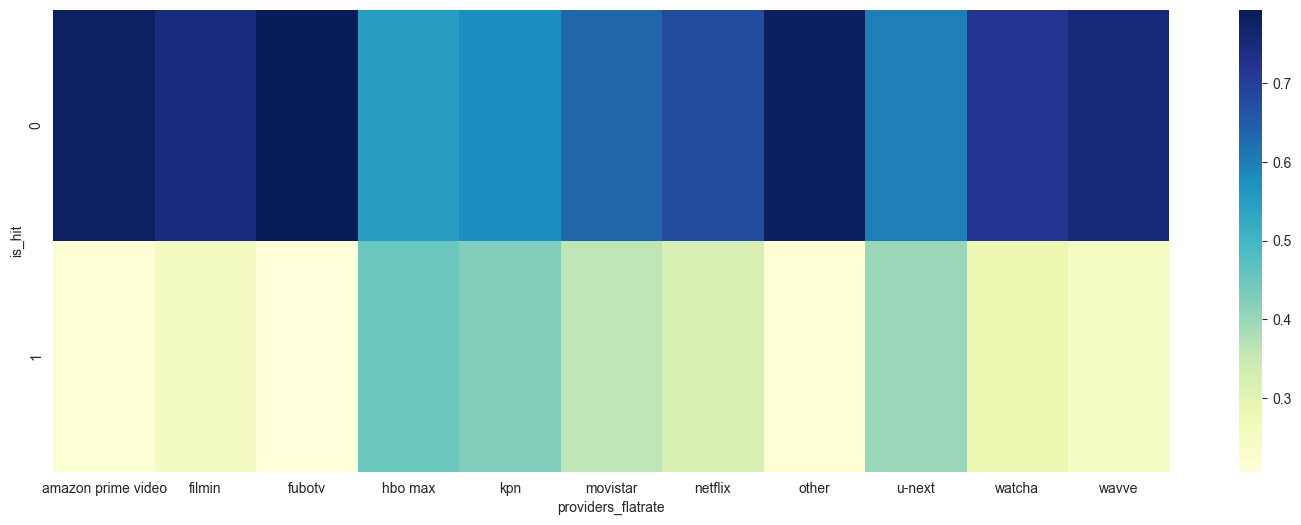

In [33]:
create_heatmap(df_m_provider, 'providers_flatrate', 'is_hit')

In [ ]:
create_heatmap(df_d_provider, 'providers_flatrate', 'is_hit')

# 토픽

In [ ]:
df_m_topic = movie_topic.merge(movie_hit_score, on="imdb_id", how="inner")
df_d_topic = drama_topic.merge(drama_hit_score, on="imdb_id", how="inner")

In [ ]:
df_m_topic_r = chi_square_test(df_m_topic, 'topic', 'is_hit')
df_d_topic_r = chi_square_test(df_d_topic, 'topic', 'is_hit')

In [ ]:
create_crosstab(df_m_topic, 'topic', 'is_hit').sort_values(1, ascending=False)

In [ ]:
create_crosstab(df_d_topic, 'topic', 'is_hit').sort_values(1, ascending=False)

In [ ]:
create_heatmap(df_m_topic, 'topic', 'is_hit')

In [ ]:
create_heatmap(df_d_topic, 'topic', 'is_hit')